In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import os
import datetime
import pandas as pd
import timeit

In [2]:
'''Micol'''
#path_raw = '/Users/micol/Documents/Imperial/Year4/Master_Project/raw_spectra' #path with raw spectra files
#path_logs = '/Users/micol/Documents/Imperial/Year4/Master_Project/bruker_logs' #path with eventlog and temperatures

'''Rachel'''
path_raw = 'D:/raw_spectra' #path containing all raw spectra
path_log = 'D:/MSci_Full' #path containing full_log

full_log = '2018-11-28-20181128102247.log' #contains temperature and status of h/c BB target

In [3]:
all_the_files = np.array([i for i in os.listdir(path_raw) if os.path.isfile(os.path.join(path_raw,i)) and i.startswith('IC_raw_spectra_')]) #all files in directory starting with 'IC_raw_spectra'

def read_temperatures_check(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list
    temp1 = [float(b) for b in (lines[1].split())[6:]]
    tempHBB1 = temp1[0]
    return tempHBB1

delete_files = [f for f in all_the_files if read_temperatures_check(path_raw,f)==0.0] #files where there is no temperature measurement
file_array = [f.strip('IC_raw_spectra.tx') for f in all_the_files if f not in delete_files] #numbers of allowed file lists, in wrong order
file_integers = sorted([int(i) for i in file_array]) #number converted to sorted integers (not naturally done)

files_list = ['IC_raw_spectra_'+str(num)+'.txt' for num in file_integers] #final file list in order

In [4]:
"""retrieving times from files"""

def read_times(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list
    times = lines[0].split() #retrieve times of beginning of all spectra in a file
    return times

In [5]:
all_times_list = [] #final time list [374x4] (in HH:MM:SS.microsec format)

for f in range(len(files_list)): #go through files_list and extract times
    all_times_list.append(read_times(path_raw, files_list[f]))

flat_list = [item for sublist in all_times_list for item in sublist] #1D list of all times (in HH:MM:SS.microsec format)

spectrum_times = [] #final time list [(374*4)x1] in seconds from midnight format

for i in flat_list: #convert times to seconds format
    time = datetime.datetime.strptime(i, '%H:%M:%S.%f')
    spectrum_times.append((time.microsecond)/1000000 +time.second+time.minute*60+time.hour*3600)

Code up to this point returns: #edit

$\textbf{spectrum_times}$: a list of times of all spectra for which the temperature is not zero

$\textbf{files_list}$: a list of all raw files for which temperature is not zero

In [6]:
time_col_name = 'Time' # name the time column in all subsequent dataframes

In [7]:
def read_file(directory, filename, separator, head='infer'):
    """
    Reads an external file and outputs it as a Pandas Dataframe
    Input: Directory, Filename (Strings)
    Output: Pandas Dataframe
    """
    path=os.path.join(directory, filename)
    dataset = pd.read_csv(path, header = head, sep=separator)
    
    return dataset

In [8]:
# Importing file X with features Y Z
x = read_file(path_log, full_log, separator=',', head=None)
y = x[[1,8,9,10,11]] # picking out relevant features
zz = y.loc[y[11] != 0] # removing zero-valued entries in column 11

zz2 = zz.reset_index()
zz2.columns = ['a','Real Time','hbb_temp','cbb_temp','Time','f'] #all the column names; 'f' is some value (0,225,270)
zz2['hc'] = np.nan #add empty column 'hc'
zz2['temp_avg'] = np.nan #add empty column 'temp_avg'

zz2.loc[zz2['f'] == 270, 'hc'] = 'h' #if f=270, 'h'
zz2.loc[zz2['f'] == 225, 'hc'] = 'c'
#zz2.loc[zz2['hc'] == 'h', 'temp_avg'] == zz2.loc['hbb_temp']

zz2.drop('a', axis=1, inplace=True)


zz2.loc[100, 'f']

270

In [9]:
zz2

,Real Time,hbb_temp,cbb_temp,Time,f,hc,temp_avg
0,11:43:33,69.82,27.28,42214,270,h,NaN
1,11:43:35,69.82,27.28,42216,270,h,NaN
2,11:43:37,69.82,27.27,42218,270,h,NaN
3,11:43:39,69.81,27.27,42220,270,h,NaN
4,11:43:41,69.81,27.27,42222,270,h,NaN
5,11:43:43,69.81,27.30,42224,270,h,NaN
6,11:43:45,69.82,27.30,42226,270,h,NaN
7,11:43:47,69.82,27.28,42228,270,h,NaN
8,11:43:49,69.81,27.28,42230,270,h,NaN
9,11:43:51,69.82,27.30,42232,270,h,NaN


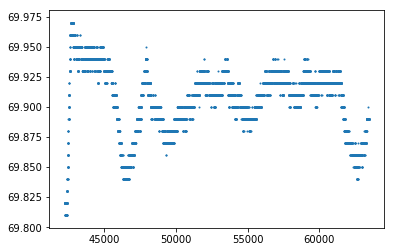

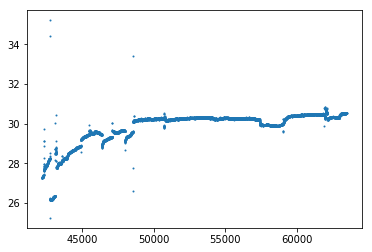

In [10]:
plt.scatter(zz2['Time'], zz2['hbb_temp'], s=1)
plt.show()
plt.scatter(zz2['Time'], zz2['cbb_temp'], s=1)
plt.show()